In [1]:
import pandas as pd 
import numpy as np
import json
import seaborn as sns

In [2]:
with open('./dataset/train/train.json', 'r') as trainfile:
    train = json.load(trainfile)
    traincategories = train['categories']
    trainAnnot = train['annotations']

In [3]:
traincategories

[{'id': 1, 'name': 'Mi28', 'supercategory': 'none'},
 {'id': 2, 'name': 'UH60', 'supercategory': 'none'},
 {'id': 3, 'name': 'F16', 'supercategory': 'none'},
 {'id': 4, 'name': 'H6', 'supercategory': 'none'},
 {'id': 5, 'name': 'F18', 'supercategory': 'none'},
 {'id': 6, 'name': 'F22', 'supercategory': 'none'},
 {'id': 7, 'name': 'F35', 'supercategory': 'none'},
 {'id': 8, 'name': 'JAS39', 'supercategory': 'none'},
 {'id': 9, 'name': 'B52', 'supercategory': 'none'},
 {'id': 10, 'name': 'JH7', 'supercategory': 'none'},
 {'id': 11, 'name': 'KF21', 'supercategory': 'none'},
 {'id': 12, 'name': 'US2', 'supercategory': 'none'},
 {'id': 13, 'name': 'Be200', 'supercategory': 'none'},
 {'id': 14, 'name': 'EF2000', 'supercategory': 'none'},
 {'id': 15, 'name': 'C2', 'supercategory': 'none'},
 {'id': 16, 'name': 'P3', 'supercategory': 'none'},
 {'id': 17, 'name': 'CL415', 'supercategory': 'none'},
 {'id': 18, 'name': 'E2', 'supercategory': 'none'},
 {'id': 19, 'name': 'Rafale', 'supercategory': 

In [4]:
with open('./dataset/val/val.json', 'r') as valfile:
    val = json.load(valfile)
    valcategories = val['categories']
    valAnnot = val['annotations']

In [5]:
valcategories

[{'id': 1, 'name': 'Mi28', 'supercategory': 'none'},
 {'id': 2, 'name': 'UH60', 'supercategory': 'none'},
 {'id': 3, 'name': 'F16', 'supercategory': 'none'},
 {'id': 4, 'name': 'H6', 'supercategory': 'none'},
 {'id': 5, 'name': 'F18', 'supercategory': 'none'},
 {'id': 6, 'name': 'F22', 'supercategory': 'none'},
 {'id': 7, 'name': 'F35', 'supercategory': 'none'},
 {'id': 8, 'name': 'JAS39', 'supercategory': 'none'},
 {'id': 9, 'name': 'B52', 'supercategory': 'none'},
 {'id': 10, 'name': 'JH7', 'supercategory': 'none'},
 {'id': 11, 'name': 'KF21', 'supercategory': 'none'},
 {'id': 12, 'name': 'US2', 'supercategory': 'none'},
 {'id': 13, 'name': 'Be200', 'supercategory': 'none'},
 {'id': 14, 'name': 'EF2000', 'supercategory': 'none'},
 {'id': 15, 'name': 'C2', 'supercategory': 'none'},
 {'id': 16, 'name': 'P3', 'supercategory': 'none'},
 {'id': 17, 'name': 'CL415', 'supercategory': 'none'},
 {'id': 18, 'name': 'E2', 'supercategory': 'none'},
 {'id': 19, 'name': 'Rafale', 'supercategory': 

In [6]:
categories = {}
for i in valcategories:
    categories[i['id']] = i['name']

categories

{1: 'Mi28',
 2: 'UH60',
 3: 'F16',
 4: 'H6',
 5: 'F18',
 6: 'F22',
 7: 'F35',
 8: 'JAS39',
 9: 'B52',
 10: 'JH7',
 11: 'KF21',
 12: 'US2',
 13: 'Be200',
 14: 'EF2000',
 15: 'C2',
 16: 'P3',
 17: 'CL415',
 18: 'E2',
 19: 'Rafale',
 20: 'Mig31',
 21: 'Su25',
 22: 'XB70',
 23: 'YF23',
 24: 'Su57',
 25: 'F15',
 26: 'KC135',
 27: 'An72',
 28: 'An22',
 29: 'B2',
 30: 'An124',
 31: 'Tu160',
 32: 'C5',
 33: 'J20',
 34: 'B1',
 35: 'C130',
 36: 'A10',
 37: 'V22',
 38: 'F117',
 39: 'WZ7',
 40: 'E7',
 41: 'CH47',
 42: 'AH64',
 43: 'Mi24',
 44: 'U2',
 45: 'AG600',
 46: 'KJ600',
 47: 'RQ4',
 48: 'Tu22M',
 49: 'SR71',
 50: 'J10',
 51: 'Mirage2000',
 52: 'AV8B',
 53: 'Tu95',
 54: 'A400M',
 55: 'MQ9',
 56: 'F14',
 57: 'Su34',
 58: 'F4',
 59: 'Mig29',
 60: 'JF17',
 61: 'TB001',
 62: 'Ka52',
 63: 'C17',
 64: 'An225',
 65: 'Y20',
 66: 'Su24',
 67: 'C390',
 68: 'TB2',
 69: 'Ka27',
 70: 'Tornado',
 71: 'Vulcan',
 72: 'Z19',
 73: 'B21',
 74: 'Mi26'}

In [7]:
catCountTrain = {categories[i]: 0 for i in categories.keys()}
catCountTrain

{'Mi28': 0,
 'UH60': 0,
 'F16': 0,
 'H6': 0,
 'F18': 0,
 'F22': 0,
 'F35': 0,
 'JAS39': 0,
 'B52': 0,
 'JH7': 0,
 'KF21': 0,
 'US2': 0,
 'Be200': 0,
 'EF2000': 0,
 'C2': 0,
 'P3': 0,
 'CL415': 0,
 'E2': 0,
 'Rafale': 0,
 'Mig31': 0,
 'Su25': 0,
 'XB70': 0,
 'YF23': 0,
 'Su57': 0,
 'F15': 0,
 'KC135': 0,
 'An72': 0,
 'An22': 0,
 'B2': 0,
 'An124': 0,
 'Tu160': 0,
 'C5': 0,
 'J20': 0,
 'B1': 0,
 'C130': 0,
 'A10': 0,
 'V22': 0,
 'F117': 0,
 'WZ7': 0,
 'E7': 0,
 'CH47': 0,
 'AH64': 0,
 'Mi24': 0,
 'U2': 0,
 'AG600': 0,
 'KJ600': 0,
 'RQ4': 0,
 'Tu22M': 0,
 'SR71': 0,
 'J10': 0,
 'Mirage2000': 0,
 'AV8B': 0,
 'Tu95': 0,
 'A400M': 0,
 'MQ9': 0,
 'F14': 0,
 'Su34': 0,
 'F4': 0,
 'Mig29': 0,
 'JF17': 0,
 'TB001': 0,
 'Ka52': 0,
 'C17': 0,
 'An225': 0,
 'Y20': 0,
 'Su24': 0,
 'C390': 0,
 'TB2': 0,
 'Ka27': 0,
 'Tornado': 0,
 'Vulcan': 0,
 'Z19': 0,
 'B21': 0,
 'Mi26': 0}

In [8]:
for i in trainAnnot:
    catCountTrain[categories[i['category_id']]] += 1

catCountTrain

{'Mi28': 97,
 'UH60': 144,
 'F16': 1315,
 'H6': 298,
 'F18': 1314,
 'F22': 514,
 'F35': 1044,
 'JAS39': 467,
 'B52': 435,
 'JH7': 215,
 'KF21': 84,
 'US2': 493,
 'Be200': 230,
 'EF2000': 613,
 'C2': 645,
 'P3': 413,
 'CL415': 214,
 'E2': 363,
 'Rafale': 486,
 'Mig31': 369,
 'Su25': 309,
 'XB70': 130,
 'YF23': 100,
 'Su57': 297,
 'F15': 1134,
 'KC135': 277,
 'An72': 137,
 'An22': 72,
 'B2': 395,
 'An124': 116,
 'Tu160': 275,
 'C5': 318,
 'J20': 565,
 'B1': 521,
 'C130': 1038,
 'A10': 583,
 'V22': 666,
 'F117': 298,
 'WZ7': 76,
 'E7': 173,
 'CH47': 188,
 'AH64': 326,
 'Mi24': 174,
 'U2': 239,
 'AG600': 209,
 'KJ600': 28,
 'RQ4': 245,
 'Tu22M': 241,
 'SR71': 208,
 'J10': 547,
 'Mirage2000': 388,
 'AV8B': 346,
 'Tu95': 275,
 'A400M': 354,
 'MQ9': 305,
 'F14': 401,
 'Su34': 378,
 'F4': 502,
 'Mig29': 196,
 'JF17': 177,
 'TB001': 61,
 'Ka52': 146,
 'C17': 531,
 'An225': 65,
 'Y20': 155,
 'Su24': 343,
 'C390': 117,
 'TB2': 275,
 'Ka27': 65,
 'Tornado': 375,
 'Vulcan': 311,
 'Z19': 43,
 'B21':

In [9]:
catCountVal = {categories[i]: 0 for i in categories.keys()}
catCountVal

{'Mi28': 0,
 'UH60': 0,
 'F16': 0,
 'H6': 0,
 'F18': 0,
 'F22': 0,
 'F35': 0,
 'JAS39': 0,
 'B52': 0,
 'JH7': 0,
 'KF21': 0,
 'US2': 0,
 'Be200': 0,
 'EF2000': 0,
 'C2': 0,
 'P3': 0,
 'CL415': 0,
 'E2': 0,
 'Rafale': 0,
 'Mig31': 0,
 'Su25': 0,
 'XB70': 0,
 'YF23': 0,
 'Su57': 0,
 'F15': 0,
 'KC135': 0,
 'An72': 0,
 'An22': 0,
 'B2': 0,
 'An124': 0,
 'Tu160': 0,
 'C5': 0,
 'J20': 0,
 'B1': 0,
 'C130': 0,
 'A10': 0,
 'V22': 0,
 'F117': 0,
 'WZ7': 0,
 'E7': 0,
 'CH47': 0,
 'AH64': 0,
 'Mi24': 0,
 'U2': 0,
 'AG600': 0,
 'KJ600': 0,
 'RQ4': 0,
 'Tu22M': 0,
 'SR71': 0,
 'J10': 0,
 'Mirage2000': 0,
 'AV8B': 0,
 'Tu95': 0,
 'A400M': 0,
 'MQ9': 0,
 'F14': 0,
 'Su34': 0,
 'F4': 0,
 'Mig29': 0,
 'JF17': 0,
 'TB001': 0,
 'Ka52': 0,
 'C17': 0,
 'An225': 0,
 'Y20': 0,
 'Su24': 0,
 'C390': 0,
 'TB2': 0,
 'Ka27': 0,
 'Tornado': 0,
 'Vulcan': 0,
 'Z19': 0,
 'B21': 0,
 'Mi26': 0}

In [10]:
for i in valAnnot:
    catCountVal[categories[i['category_id']]] += 1

catCountVal

{'Mi28': 31,
 'UH60': 35,
 'F16': 378,
 'H6': 94,
 'F18': 250,
 'F22': 134,
 'F35': 267,
 'JAS39': 96,
 'B52': 123,
 'JH7': 52,
 'KF21': 23,
 'US2': 135,
 'Be200': 55,
 'EF2000': 144,
 'C2': 168,
 'P3': 58,
 'CL415': 49,
 'E2': 85,
 'Rafale': 170,
 'Mig31': 85,
 'Su25': 85,
 'XB70': 42,
 'YF23': 36,
 'Su57': 64,
 'F15': 306,
 'KC135': 67,
 'An72': 35,
 'An22': 19,
 'B2': 115,
 'An124': 29,
 'Tu160': 95,
 'C5': 69,
 'J20': 142,
 'B1': 105,
 'C130': 255,
 'A10': 107,
 'V22': 165,
 'F117': 60,
 'WZ7': 19,
 'E7': 32,
 'CH47': 45,
 'AH64': 50,
 'Mi24': 48,
 'U2': 68,
 'AG600': 50,
 'KJ600': 19,
 'RQ4': 50,
 'Tu22M': 92,
 'SR71': 57,
 'J10': 101,
 'Mirage2000': 53,
 'AV8B': 88,
 'Tu95': 78,
 'A400M': 109,
 'MQ9': 52,
 'F14': 108,
 'Su34': 84,
 'F4': 167,
 'Mig29': 58,
 'JF17': 36,
 'TB001': 20,
 'Ka52': 32,
 'C17': 129,
 'An225': 17,
 'Y20': 42,
 'Su24': 88,
 'C390': 25,
 'TB2': 136,
 'Ka27': 18,
 'Tornado': 84,
 'Vulcan': 82,
 'Z19': 26,
 'B21': 5,
 'Mi26': 5}

In [11]:
sns.set_theme(style="darkgrid")


C:\Users\elsto\AppData\Local\Temp\ipykernel_32728\1013729791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(catCountTrain.values()), y=list(catCountTrain.keys()), palette="deep")


<Axes: >

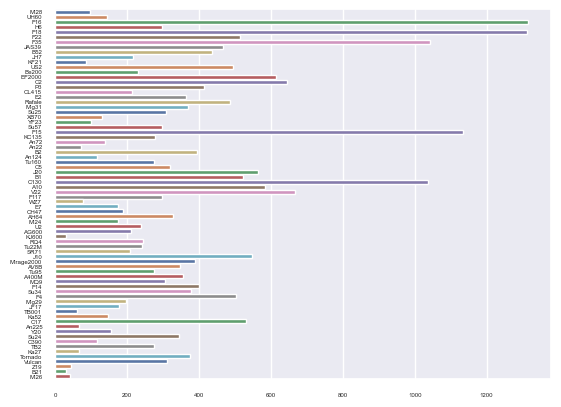

In [12]:
sns.set(font_scale=0.4)
sns.barplot(x=list(catCountTrain.values()), y=list(catCountTrain.keys()), palette="deep")

C:\Users\elsto\AppData\Local\Temp\ipykernel_32728\2851063947.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(catCountVal.values()), y=list(catCountVal.keys()), palette="deep")


<Axes: >

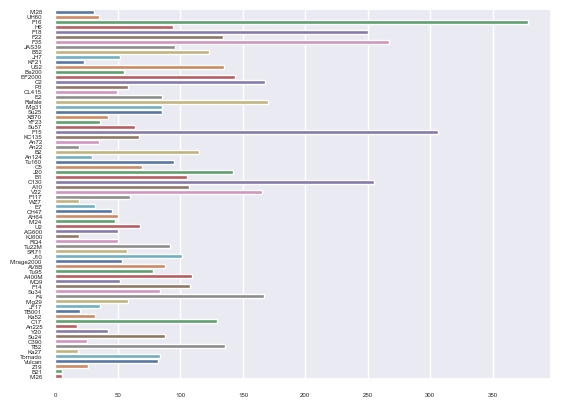

In [13]:
sns.barplot(x=list(catCountVal.values()), y=list(catCountVal.keys()), palette="deep")

### Class imbalance for both train and validation